In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import random
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import statistics
from sklearn.model_selection import KFold

ANALYSIS 1:

In [2]:
df = pd.read_csv('cleveland.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
len(df)
#303 points

303

In [5]:
df['num'] = df.num.apply(lambda x: (1 if x>0 else 0))

In [6]:
df.isna()
df.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [7]:
df_filtered=df[df.thal!='?']

In [8]:
len(df_filtered)

301

In [9]:
df_filtered[df_filtered['ca'] == '?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [10]:
df_filtered=df_filtered[df_filtered.ca!='?']

In [11]:
len(df_filtered)

297

In [12]:
for column in list(df_filtered.columns):
    df_filtered[column] = df_filtered[column].astype(float)

In [13]:
df_filtered=(df_filtered-df_filtered.min())/(df_filtered.max()-df_filtered.min())

In [14]:
for column in list(df_filtered.columns)[:-1]:
    (r,p)=stats.pearsonr(df_filtered[column], df_filtered['num'])
    if p<0.05:
        print("The pearson correlation between "+column+" and value is : "+str(r)+" "+str(p))

The pearson correlation between age and value is : 0.22707515465323652 7.862867945609208e-05
The pearson correlation between sex and value is : 0.278466696653796 1.0850757450168795e-06
The pearson correlation between cp and value is : 0.40894468667523926 2.1134928777043154e-13
The pearson correlation between trestbps and value is : 0.15349002570252018 0.008054796358876234
The pearson correlation between restecg and value is : 0.16634348816602423 0.004044406128536058
The pearson correlation between thalach and value is : -0.4238170641833711 2.2397153233940446e-14
The pearson correlation between exang and value is : 0.4213554904564531 3.2724895729945574e-14
The pearson correlation between oldpeak and value is : 0.4240520567159989 2.1597372771145482e-14
The pearson correlation between slope and value is : 0.3330491087395556 3.9974247521000775e-09
The pearson correlation between ca and value is : 0.4631886250630226 3.3589468512702786e-17
The pearson correlation between thal and value is : 

For the above column names, we have the pearson corrlation with the output less than 0.05, which means that we are confident that these columns are correlated

In [15]:
X = df_filtered[['age', 'sex', 'cp', 'trestbps', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']].values
# X=df_filtered[['trestbps',  'cp']].values

In [16]:
Y=df_filtered['num'].values

In [17]:
 X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1,random_state=42)

We have filtered and normalized out data till this step, now we create our functions for training and testing which we would later use to train on the k-folded data

In [18]:
def evaluate(model,X_train,y_train,labels=[0,1]):
    distances, indices = model.kneighbors(X_train)
    y_pred=[]
    for i in range(len(X_train)):
        nearest_neighbours=indices[i]
        healthy=0
        sick=0
        for neighbour in nearest_neighbours:
            if y_train[neighbour]==0:
                healthy+=1
            else:
                sick+=1
        if healthy>sick:
            y_pred.append(0)
        else:
            y_pred.append(1)
    (p,r,f,s) = precision_recall_fscore_support(y_train, y_pred, labels=[0,1])
    return (p,r,f,s)

In [19]:
def test(model,y_train,X_test,y_test,labels=[0,1]):
    distances, indices = model.kneighbors(X_test)
    y_pred=[]
    for i in range(len(X_test)):
        nearest_neighbours=indices[i]
        healthy=0
        sick=0
        for neighbour in nearest_neighbours:
            if y_train[neighbour]==0:
                healthy+=1
            else:
                sick+=1
        if healthy>sick:
            y_pred.append(0)
        else:
            y_pred.append(1)
    (p,r,f,s) = precision_recall_fscore_support(y_test, y_pred, labels=[0,1])
    return (p,r,f,s)

In [20]:
best_f_score_model=[0,0]
for i in range(2,len(X)//2):
#     X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1,random_state=42)
    kfold = KFold(10)
    nn = NearestNeighbors(n_neighbors=i, metric='euclidean', algorithm='auto')
    for train, test in kfold.split(X,Y):
        X_train,y_train = df_filtered[['age', 'sex', 'cp', 'trestbps', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']].iloc[train], df_filtered[['num']].iloc[train]
        X_test,y_test=df_filtered[['age', 'sex', 'cp', 'trestbps', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']].iloc[test], df_filtered[['num']].iloc[test]
        model=nn.fit(X_train.values)
        distances, indices = model.kneighbors(X_test.values)
        y_pred=[]
        for i in range(len(X_test.values)):
            nearest_neighbours=indices[i]
            healthy=0
            sick=0
            for neighbour in nearest_neighbours:
                if y_train.values[neighbour]==0:
                    healthy+=1
                else:
                    sick+=1
            if healthy>sick:
                y_pred.append(0)
            else:
                y_pred.append(1)
        (p,r,f,s) = precision_recall_fscore_support(y_test.values, y_pred, labels=[0,1])

    #     print(f'precision={p}, recall={r}, f-score={f}, support={s}')
        if best_f_score_model[0]<f[0]:
            best_f_score_model[0]=max(best_f_score_model[0],f[0])
            best_f_score_model[1]=i

In [21]:
best_f_score_model

[0.972972972972973, 28]

The Best model is the one with 28 nearest neighbours, with the above 9 attributes.


In [22]:
scores_for_k_value=[]
best_f_score_model=[0,0]
for i in range(2,len(X)//2):
    sample_score_array=[]
#     X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1,random_state=42)
    kfold = KFold(10)
    nn = NearestNeighbors(n_neighbors=i, metric='euclidean', algorithm='auto')
    for train, test in kfold.split(X,Y):
        X_train,y_train = df_filtered[['age', 'sex', 'cp', 'trestbps', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']].iloc[train], df_filtered[['num']].iloc[train]
        X_test,y_test=df_filtered[['age', 'sex', 'cp', 'trestbps', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']].iloc[test], df_filtered[['num']].iloc[test]
        model=nn.fit(X_train.values)
        distances, indices = model.kneighbors(X_test.values)
        y_pred=[]
        for i in range(len(X_test.values)):
            nearest_neighbours=indices[i]
            healthy=0
            sick=0
            for neighbour in nearest_neighbours:
                if y_train.values[neighbour]==0:
                    healthy+=1
                else:
                    sick+=1
            if healthy>sick:
                y_pred.append(0)
            else:
                y_pred.append(1)
        (p,r,f,s) = precision_recall_fscore_support(y_test.values, y_pred, labels=[0,1])
        sample_score_array.append((p,r,f,s))

        if best_f_score_model[0]<f[0]:
            best_f_score_model[0]=max(best_f_score_model[0],f[0])
            best_f_score_model[1]=i
    scores_for_k_value.append(sample_score_array)

In [23]:
f1_scores=[]
for k_measure_array in scores_for_k_value:
    score_sum=0
    for scores in k_measure_array:
            score_sum+=scores[2][0]
    score_sum/=10
    f1_scores.append(score_sum)

In [24]:
for i in range(1,len(f1_scores)):
    print(i+1,f1_scores[i])

2 0.8241046684893434
3 0.7759797097189847
4 0.8121920048390636
5 0.8134116885634912
6 0.8178199993724812
7 0.8110381579546665
8 0.8391130378630379
9 0.8095562933798227
10 0.8244557026793868
11 0.8190377385623566
12 0.8234710208903758
13 0.8086996917123959
14 0.8153397722328112
15 0.807166150647425
16 0.8070606317401552
17 0.7960455405470885
18 0.7988653306765829
19 0.8003871069939181
20 0.8046728585937613
21 0.7964057550125662
22 0.8118015793751088
23 0.8084941756782363
24 0.8192512277659336
25 0.8132834306216659
26 0.8233452748298516
27 0.8155409102985004
28 0.816762629755514
29 0.8097197044772946
30 0.8162363139660403
31 0.8182998060295323
32 0.8287491987420831
33 0.8211338141266984
34 0.8338496851732146
35 0.8283233693837408
36 0.8338496851732146
37 0.8338496851732146
38 0.8371825396825396
39 0.8338211951447245
40 0.8374196799932095
41 0.8374196799932095
42 0.8374196799932095
43 0.8374196799932095
44 0.8408064892623717
45 0.8352936687495511
46 0.8415844612903436
47 0.832172010995540

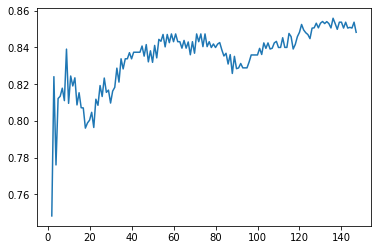

In [25]:
import matplotlib.pyplot as plt
plt.plot(range(2,len(X)//2),f1_scores)
plt.savefig("img1.png")

In [26]:
median_scores=[]
for k_measure_array in scores_for_k_value:
    f1_scores_internal=[]
    for scores in k_measure_array:
            f1_scores_internal.append(scores[2][0])
            f1_scores_internal.sort()
    median_scores.append((f1_scores_internal[4]+f1_scores_internal[5])/2)

In [27]:
for i in range(1,len(median_scores)):
    print(i+1,median_scores[i])

2 0.8284600389863548
3 0.7804054054054055
4 0.7993447993447994
5 0.7945041816009558
6 0.8074074074074074
7 0.7717121588089331
8 0.8304924242424243
9 0.7963800904977375
10 0.8229166666666667
11 0.8
12 0.8128128128128127
13 0.7999999999999999
14 0.7999999999999999
15 0.7988614800759014
16 0.7870967741935484
17 0.7785547785547784
18 0.7999999999999999
19 0.7846153846153845
20 0.7870967741935484
21 0.7785547785547784
22 0.8136574074074074
23 0.8013468013468013
24 0.8316498316498316
25 0.818014705882353
26 0.8191721132897604
27 0.8136574074074074
28 0.8136574074074074
29 0.8136574074074074
30 0.8136574074074074
31 0.8136574074074074
32 0.8136574074074074
33 0.8136574074074074
34 0.8191721132897604
35 0.8191721132897604
36 0.8191721132897604
37 0.8191721132897604
38 0.824074074074074
39 0.8191721132897604
40 0.8284313725490196
41 0.8284313725490196
42 0.8284313725490196
43 0.8284313725490196
44 0.8284313725490196
45 0.8284313725490196
46 0.8409090909090908
47 0.8360071301247772
48 0.84090909

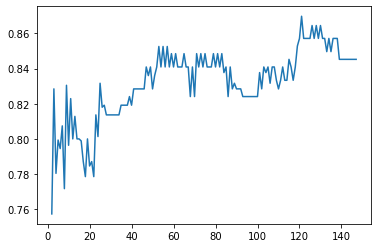

In [28]:
import matplotlib.pyplot as plt
plt.plot(range(2,len(X)//2),median_scores)
plt.savefig("img2.png")

In [29]:
X = df_filtered[['age', 'sex', 'cp', 'trestbps', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']].values
Y=df_filtered['num'].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1,random_state=42)
model= NearestNeighbors(n_neighbors=8, metric='euclidean', algorithm='auto').fit(X_train)
distances, indices = model.kneighbors(X_test)
y_pred=[]
for i in range(len(X_test)):
    nearest_neighbours=indices[i]
    healthy=0
    sick=0
    for neighbour in nearest_neighbours:
        if y_train[neighbour]==0:
            healthy+=1
        else:
            sick+=1
    if healthy>sick:
        y_pred.append(0)
    else:
        y_pred.append(1)
(p,r,f,s) = precision_recall_fscore_support(y_test, y_pred, labels=[0,1])

In [30]:
p,r,f,s

(array([0.94444444, 0.83333333]),
 array([0.89473684, 0.90909091]),
 array([0.91891892, 0.86956522]),
 array([19, 11]))

In [31]:
print("accuracy is ", f[0])

accuracy is  0.918918918918919
